# Data processing, model training and testing, and accuracy metics
In this exercise we are going to go through the basics of getting machine learning models running via scikit-learn. First, let's start by recreating the vizualizations of the iris plot that I showed in the lecture earlier.

Note: the iris vizualization code contains heavily modified code originally written by Richard Ji (https://shichaoji.com/2017/02/16/famous-iris-dataset-visualization/)

You can do this exercise using the jupyter notebook server at https://elixirschool.recas.ba.infn.it/user/schrider/lab or run things locally provided you have all of the necessary libraries installed.

## 1. Import the iris data and plotting essentials (and of course, numpy)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets
import numpy as np

iris = sklearn.datasets.load_iris()
print(iris.data.shape)
print(iris.data)
print(iris.target)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

## 2. Plot a single feature of the iris dataset.

Below we are going to create a simple scatter plot of all 150 examples in the iris dataset, colored by class. We are only plotting sepal length here so in order to better see our data points we are going to add some Gaussian noise to the y-axis.

([], <a list of 0 Text yticklabel objects>)

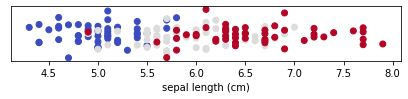

In [5]:
plt.figure(figsize=(7, 1))
plt.clf()

plt.scatter(iris.data[:, 0], np.random.normal(0, 1, len(iris.data)), c=iris.target, cmap=plt.cm.coolwarm)
plt.xlabel(iris.feature_names[0])
plt.yticks([])

That doesn't look very good, and it seems we would have a tough time separating these classes on the basis of this measurement alone. It might be that some of our features do better than this. Give it a shot below:

In [6]:
# insert your plotting code here

## 3. Add a second feature to our plot.
Well, that's nice, but let's see if we can do better by incporating some more information. What happens if we add sepal width into the mix?

Text(0, 0.5, 'sepal width (cm)')

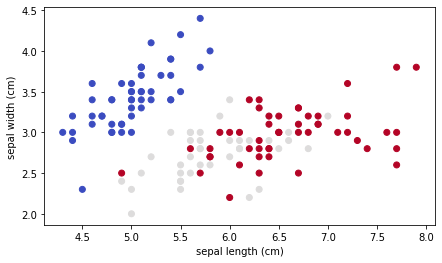

In [7]:
plt.figure(figsize=(7, 4))
plt.clf()

plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap=plt.cm.coolwarm)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

## 4. Let's see it in 3D!

We are going to have to import another plotting tool for this, called `Axes3D`. Then we can add an additional feature to our plot and see if things look even more separable

Text(0.5, 0, 'sepal width (cm)')

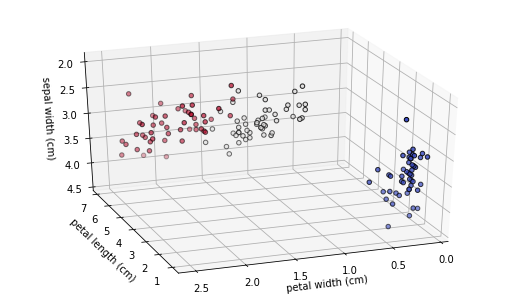

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 4))
plt.clf()

ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(iris.data[:, 3], iris.data[:, 2], iris.data[:, 1], c=iris.target, cmap=plt.cm.coolwarm, edgecolors='black')

ax.set_xlabel(iris.feature_names[3])
ax.set_ylabel(iris.feature_names[2])
ax.set_zlabel(iris.feature_names[1])

Okay, now it's starting to look like we can really make some headway in separating these classes, and we could probably do even better in 4D. But vizualising stuff in 4D is kind of challenging, for humans anyway, and you are probably getting bored of plotting, so let's do some actual machine learning.

## 5. Training a _k_-NN classifier on the Iris dataset: preprocessing
Let's train a _k_-neareast neighbor. First, we are going to have to preprocess our data as discussed in the lecture to make sure that the different scales of features don't get us into trouble.

In [9]:
from sklearn.preprocessing import StandardScaler

# First, reload our iris data in a manner that is more convenient for training/testing
X, y = sklearn.datasets.load_iris(return_X_y=True)

# Let's have a look at our y values (labels)
print(y)

# Next, we rescale our X data. What does this function do?
X = StandardScaler().fit_transform(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Next, we split our data into training and test sets. This is super easy to do using scikit-learn.

In [10]:
from sklearn.model_selection import train_test_split

# Here we split into training and test data (ps: what's up with this stratify parameter?)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

We now have 60% of the data in our training set and 40% in our test set. There is nothing magical about this split ratio. It is totally arbitrary and for larger data sets a smaller fraction in the test set may be sufficient as long as you can estimate your accuracy metrics with a reasonable degree of certainty.

## 6. Training a _k_-NN classifier on the Iris dataset: training and testing

Now that we have our training and test data we are ready to do some real work (after some more imports, of course). We will start by training our classifier and computing a very simple performance metric on our test data: accuracy (number of correctly classified examples / total number of examples classified).

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# This function takes a single parameter: k. Let's start with one.
clf = KNeighborsClassifier(1)

# Ready to train? here we go!
clf.fit(X_train, y_train)
# Well that was easy...

clf.score(X_test, y_test)

0.9666666666666667

Not too shabby!

But maybe we could do better (or worse!) with different values of k. Try it out!

In [12]:
# Insert code here:

Nice work! Or I'm sorry it turned out that way! You know, whichever...

## 7. Training a _k_-NN classifier on the Iris dataset: cross-validation
The fact is, we really don't have a lot of data here. This means we have very little information to train on, in which case we may not be generalizing as well as we would like, and also that our test data are limited so we may not have a very precise estimate of our accuracy. We can address these two problems with the same solution: cross-validation.

In [13]:
import sklearn.model_selection

scores = sklearn.model_selection.cross_validate(clf, X, y, cv=5)
print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.0008812 , 0.00038886, 0.00033212, 0.00030208, 0.00029373]), 'score_time': array([0.00179791, 0.001297  , 0.00124002, 0.00126386, 0.00195146]), 'test_score': array([0.93333333, 0.96666667, 0.93333333, 0.9       , 1.        ])}
0.9466666666666665


Try some different values of the `cv` paremeter here. What is it doing? Based on your results, what would you say a good estimate of our classifier's accuracy would be if it were trained on the *whole* dataset? Why?

## 8. Support vector machines, and hyperparameter optimization
Now let's try out a different type of classifier, the support vector machine, and see if we do any better.

In [14]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1, gamma=0.1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.95

Not bad, but what are these `C` and `gamma` parameters? Actually, these are `hyperpameters`, kind of like normal parameters but more awesome. Actually this means that these are parameters governing the optimization of the actual model parameters (i.e. the parameters of the separating hyperplane and its surrounding margin, which are determined by the support vectors).

Note: `gamma` is a hyperparameter of the radial basis function (or Gaussian kernel), which is the most population kernel function used with SVMs. Other kernel functions have other hyperparemters to optimize, while `C` is a hyperparameter of the SVM algorithm.

When using SVMs, before optimizing our model parameters, it is recommended that we optimize our hyperparameters. How to do this? One possibility is to use a separate validation set, but if we are short on data as is surely the case here then we can once again rely on cross-validation. The key here is that we are only going to be looking at our training set. I am going to leave this one as an exercise to you, but with a bit of help below:

In [15]:
scores = []
for C in [0.01, 0.1, 1, 10, 100]:
    for gamma in [0.0001, 0.001, 0.01, 0.1, 1]:
        hyperparams=(C, gamma)
        clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        
        #TODO: do some work here
        
        scores.append([meanCVScore, hyperparams])

print(scores)

#TODO: do some more work here

print(bestHyperParams)
bestC, bestGamma = bestHyperParams

NameError: name 'meanCVScore' is not defined

We now have our best hyperparamter combination! Okay, that's not really true--all we did was a hyperparameter grid search, but that tends to work well in practice for SVMs. So let's use this hyperparemter combination to train our SVM and see how well we do on our test set. Again, leaving this as an exercise to you:

In [16]:
# insert code here.

## 9. Random forests, better accuracy metrics, and the best accuracy metrics (in my opinion).

Now we are going to try one last classification approach, random forests, and also take the opportunity to learn a few more accuracy metrics while we are at it. First, we have to import sklearn.ensemble. The module is so-named because random forests are an ensemble method--a better classifier is constructed from ensemble of potentially not-so-great classifiers.

In [17]:
import sklearn.ensemble

X, y = sklearn.datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

clf = sklearn.ensemble.RandomForestClassifier() #let's start with default hyperperameters here
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/dan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9333333333333333

That was quick and easy. Notice how I snuck in a re-load of the dataset but didn't bother with the standardization and yet we still did okay. What's up with that?

I also haven't played around with the hyperparemeters at all. If you end up having time, feel free to play around below with hyperparemeter optimization for your forest and see how much your scores vary--you may find the results illuminating about random forests.

In [18]:
# insert code here if desired.

### Sensitivity, specificity, precision, and recall

Let's refer to one of our clsses (say, class 0) as negatives, and the rest (class 1) as positives. Definitions:

tp: the number of true positives (class 1 examples correctly classified as such).
fp: the number of false positives (class 0 examples incorrectly classified as class 1).
tn: the number of true negatives (class 0 examples correctly classified as such).
fp: the number of false negatives (class 1 examples incorrectly classified as class 0).

sensitivity (aka recall): tp / (tp + fn)

specificity: tn / (fp + tn)

precision (aka positive predictive value): tp / (tp + fp)

false discovery rate: 1 - precision = fp / (tp + fp)

These metrics really only make sense for binary classifiers, so we will re-cast our problem of distinguishing one species of iris from the other two:

In [19]:
newY = []
for classLabel in y:
    if classLabel == 0:
        newY.append(0)
    else:
        newY.append(1)
y = newY

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

Now we can calculate each of the metrics above. Do it!

In [20]:
binClf = sklearn.ensemble.RandomForestClassifier()
binClf.fit(X_train, y_train)
preds = binClf.predict(X_test)
print(preds)

# TODO: fill in the missing part here

print(tp, fp, tn, fn)
print(sensitivity, specificity, precision, recall)

[1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0]


/Users/dan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


NameError: name 'tp' is not defined

### ROC and precision-recall curves
Those metrics seem useful, but it is important to keep in mind that for any classifier we must impose a threshold on its *decision function*. For the SVM, this is essentially the distance from the separating hyperplane, for random forests, we get a posterior probability estimate of class membership. So really the numbers above only tell us about one potential classifier that can be made from the trained model--others can be made by changing our decision threshold.

We can get a fuller picture of the potential discriminative power of a classification model by seeing how some of these metrics change according to our decision threshold, and that is what we will do below.


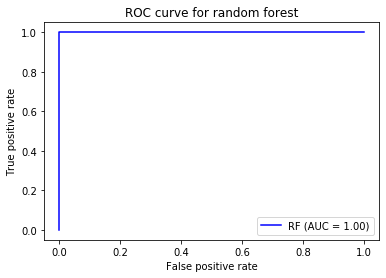

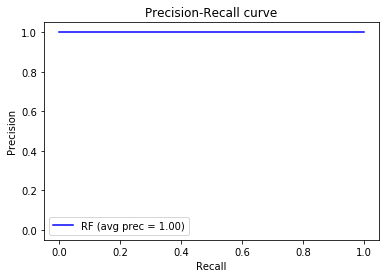

In [21]:
import sklearn.metrics

predScores = binClf.predict_proba(X_test)[:,1]

def plotROCsAndPR(y_test, predScores):
    fprs, tprs, threshes = sklearn.metrics.roc_curve(y_test, predScores)
    auc = sklearn.metrics.roc_auc_score(y_test, predScores)
    precisions, recalls, threshes = sklearn.metrics.precision_recall_curve(y_test, predScores)
    avgPrec = sklearn.metrics.average_precision_score(y_test, predScores)

    plt.figure()
    plt.plot(fprs, tprs, label="RF (AUC = %.2f)" %(auc), color="b")
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for random forest')
    plt.legend(loc='best')
    plt.ylim((-0.05, 1.05))
    plt.show()

    plt.figure()
    plt.plot(recalls, precisions, label = "RF (avg prec = %.2f)" %(avgPrec), color="b")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc='best')
    plt.ylim((-0.05, 1.05))
    plt.show()

plotROCsAndPR(y_test, predScores)
#NOTE: scikit-learn now makes this even easier: see RocCurveDisplay and PrecisionRecallDisplay in the documentation

Okay, that doesn't look very interesting, so let's try a larger dataset.
### Surprise detour into the Wisconsin Breast Cancer dataset

The goal here is to discriminate between benign and malignant tumors on the basis of a number of measurements from the tumor.

/Users/dan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


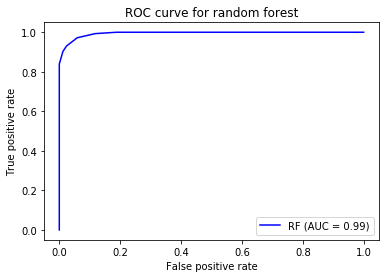

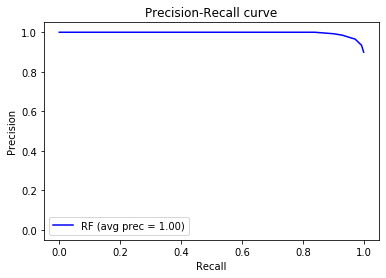

In [22]:
bcX, bcy = sklearn.datasets.load_breast_cancer(return_X_y=True)
bcX_train, bcX_test, bcy_train, bcy_test = train_test_split(bcX, bcy, test_size=0.4, stratify=bcy)

binClf = sklearn.ensemble.RandomForestClassifier()
binClf.fit(bcX_train, bcy_train)
predScores = binClf.predict_proba(bcX_test)[:,1]
plotROCsAndPR(bcy_test, predScores)

So now we can see what our TP and FP rates are for all possible posterior probability thresholds. Think about what we want these curves to be shaped like.

Fun note about ROC curves: the area under the curve (AUC) is the probability that any randomly selected positive example will have a higher decision function score (in this case posterior probability of membership in class one) than a randomly selected negative example.

### Back to the iris data set, and confusion matrices

Now let's go back to our three class iris data set and view the one metric to rule them all (at least for categorical data).

First, we are going to define a function for plotting our output. You don't have to look closely at this, as the latest versions fo scikit-learn now have built-in functionality for this but I am including it to ensure compatibility.

In [25]:
#here's my confusion matrix function
#sklearn now has it's own confusion matrix plotting utilities, but they differ by version
#we are using this one intead just to ensure compatibility
#best not to look at this code unless you really have to...
def makeConfusionMatrixHeatmap(datain, title, trueClassOrderLs, predictedClassOrderLs, ax, normalize=True):
    data = datain[:]
    data.reverse()
    fig,ax= plt.subplots(1,1)
    data = np.array(data)
    if normalize:
        data = sklearn.preprocessing.normalize(data, axis=1, norm='l1')
    heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

    if normalize:
        thresh = 50
    else:
        thresh = int(sum(data[0])/2)
        print(thresh)
    for i in range(len(predictedClassOrderLs)):
        for j in reversed(range(len(trueClassOrderLs))):
            val = data[j, i]
            if normalize:
                val *= 100
            if val > thresh:
                c = '0.9'
            else:
                c = 'black'
            if normalize:
                ax.text(i + 0.5, j + 0.5, '%.2f%%' % val, horizontalalignment='center',
                        verticalalignment='center', color=c, fontsize=9)
            else:
                ax.text(i + 0.5, j + 0.5, '%d' % val, horizontalalignment='center',
                        verticalalignment='center', color=c, fontsize=9)

    cbar = plt.colorbar(heatmap, cmap=plt.cm.Blues, ax=ax)
    cbar.set_label("Fraction of simulations assigned to class", rotation=270, labelpad=20, fontsize=11)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.axis('tight')
    ax.set_title(title)

    #labels
    ax.set_xticklabels(predictedClassOrderLs, minor=False, fontsize=9, rotation=45)
    ax.set_yticklabels(reversed(trueClassOrderLs), minor=False, fontsize=9)
    ax.set_xlabel("Predicted class")
    ax.set_ylabel("True class")

Okay, let's take a look at this code below which computes and plots a more detailed summary of our classifier's performance.

10


/Users/dan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


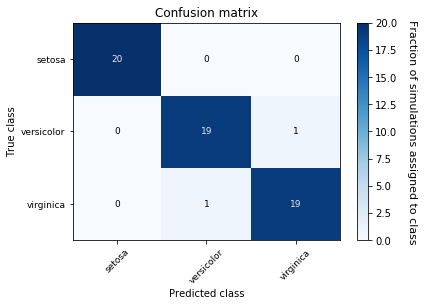

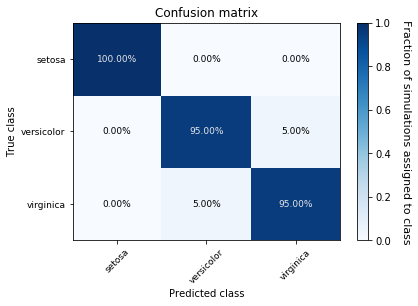

In [26]:
import sklearn.preprocessing

iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)

clf = sklearn.ensemble.RandomForestClassifier()
clf.fit(X_train, y_train)

    
#now the actual work
#first get the predictions
y_pred = clf.predict(X_test)

counts=[[0.,0.,0.],[0.,0.,0.],[0.,0.,0.]]
for i in range(len(y_test)):
    counts[y_test[i]][y_pred[i]] += 1

#now do the plotting
makeConfusionMatrixHeatmap(counts, "Confusion matrix", class_names, class_names, ax, normalize=False)
plt.show()
makeConfusionMatrixHeatmap(counts, "Confusion matrix", class_names, class_names, ax, normalize=True)
plt.show()

Take a careful look and make sure you understand what is being shown here. Although this is not the reason for the name, some find this plot confusing. But spend a bit of time with it (discussing with friends if needed) and you should see that not only is this plot fairly straightforward, it actually contains all of the information we would like to know about our classifier (unless we want to tweak classification thresholds in which case ROC and precision-recall curves are handy).

Note the difference between the two versions of the plot above. Which one do you think would be more useful in which situations? (Think about class imbalances, data set sizes, etc).

If you find yourself with more time, you may wish to compare to another classifier (e.g. SVM). So plot a confusion matrix for that one too if you like. Come to think of it, how is it possible that an SVM, which draws a hyperplane between two classes of data, can be used for a 3-way classification problem like this anyway?

In [ ]:
# Insert optional code here

# Conclusion
That's it! Hopefully this was a helpful demonstration of how to train a few classifiers in scikit-learn, the importance of hyperparameter optimization, and most importantly, how to evaluate model performance. Hit me up on slack or email (drs@unc.edu) if you have any questions.